In [6]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
# Her epoch sonunda A ve B'nin değerlerini, hatayı minimize edecek şekilde güncelle
def gradient_decent(X, y, y_hat, A, B, lr=0.01):
    dA = np.sum(-(y - y_hat))
    dB = np.sum((y - y_hat) * X)
    
    updated_A = A - lr * dA
    updated_B = B - lr * dB
    
    return updated_A, updated_B

In [121]:
# A ve B'nin değerlerini rastgele ata, X, A ve B'yi belirlenen fonksiyondan geçirip
# tahmini y değerini (y_hat) bul. Gerçek y ile y_hat arasındaki hatayı bul, A ve B'yi güncelle
def train(X, y, lr=0.0001, epochs=1000):
    A = np.random.normal(0)
    B = np.random.normal(0)
    
    hist = []
    for i in range(epochs):
        y_hat = A * np.sin(B * X)
        mse = np.sum( (y - y_hat)**2 ) / len(y)
        print("Epoch {} - {}".format(i, mse))
        hist.append((mse, A, B))
        A, B = gradient_decent(X, y, y_hat, A, B, lr)
    return hist

In [122]:
# Değerler down scale edilerek de verilebilir.
X = np.array(range(20))
y = np.array([10, 14, 11, 8, 6, 11, 11, 6, 17, 15, 2, 4, 10, 5, 14, 12, 2, 4, 15, 18])

In [123]:
hist = train(X, y, lr=0.0001)

Epoch 0 - 118.89431549369246
Epoch 1 - 115.94804901788177
Epoch 2 - 115.92089405012197
Epoch 3 - 113.53882055273735
Epoch 4 - 126.17138486121785
Epoch 5 - 118.97096854745897
Epoch 6 - 120.10570372118514
Epoch 7 - 118.72802550856977
Epoch 8 - 118.84775660763341
Epoch 9 - 121.97634497950904
Epoch 10 - 116.33885474936986
Epoch 11 - 121.34927189202135
Epoch 12 - 118.26386464124619
Epoch 13 - 121.23895318749801
Epoch 14 - 115.86701596802463
Epoch 15 - 118.92340400786952
Epoch 16 - 120.02923218728927
Epoch 17 - 118.03496745763584
Epoch 18 - 119.74238578073398
Epoch 19 - 117.57744021653441
Epoch 20 - 118.49245188748924
Epoch 21 - 119.03403619791861
Epoch 22 - 117.88622611605987
Epoch 23 - 118.97137653023972
Epoch 24 - 116.99012625100065
Epoch 25 - 117.93954023511637
Epoch 26 - 120.37332077110491
Epoch 27 - 118.55856056807586
Epoch 28 - 116.47236843874566
Epoch 29 - 115.88470568266314
Epoch 30 - 120.22709571572071
Epoch 31 - 115.02130611322518
Epoch 32 - 117.33880112143643
Epoch 33 - 116.16564

Epoch 376 - 54.769451213031836
Epoch 377 - 97.87502584832177
Epoch 378 - 251.50556653014127
Epoch 379 - 186.9111998104312
Epoch 380 - 141.92041007469933
Epoch 381 - 163.98496318007844
Epoch 382 - 180.6961850348757
Epoch 383 - 142.09087563145945
Epoch 384 - 169.30752750324987
Epoch 385 - 149.8267005408237
Epoch 386 - 183.43910552420962
Epoch 387 - 125.20052651636487
Epoch 388 - 149.07748642387511
Epoch 389 - 160.20005052680216
Epoch 390 - 152.90516180997835
Epoch 391 - 158.9283384928975
Epoch 392 - 147.64025373548645
Epoch 393 - 155.46181296772963
Epoch 394 - 156.57881689530785
Epoch 395 - 157.08344062360294
Epoch 396 - 147.90368305820542
Epoch 397 - 144.68923047652038
Epoch 398 - 141.22258043165755
Epoch 399 - 154.14055083504158
Epoch 400 - 172.57929552963842
Epoch 401 - 121.46573740648907
Epoch 402 - 149.08266529322952
Epoch 403 - 141.17319680528243
Epoch 404 - 148.86442372177126
Epoch 405 - 123.70567130339437
Epoch 406 - 134.48998964280608
Epoch 407 - 162.42526979893663
Epoch 408 - 1

In [124]:
np_hist = np.array(hist)
min_idx = np.argmin(np_hist[:, 0]) # Hatanın en küçük olduğu noktayı bul

In [125]:
np_hist[min_idx] # Minimum hatada A ve B değerleri

array([  43.62969208,   11.29406397, -100.41482602])

In [126]:
loss = np_hist[:, 0]
A = np_hist[min_idx, 1]
B = np_hist[min_idx, 2]

y_hat = A * np.sin(B * X)

Text(0.5,1,'LOSS')

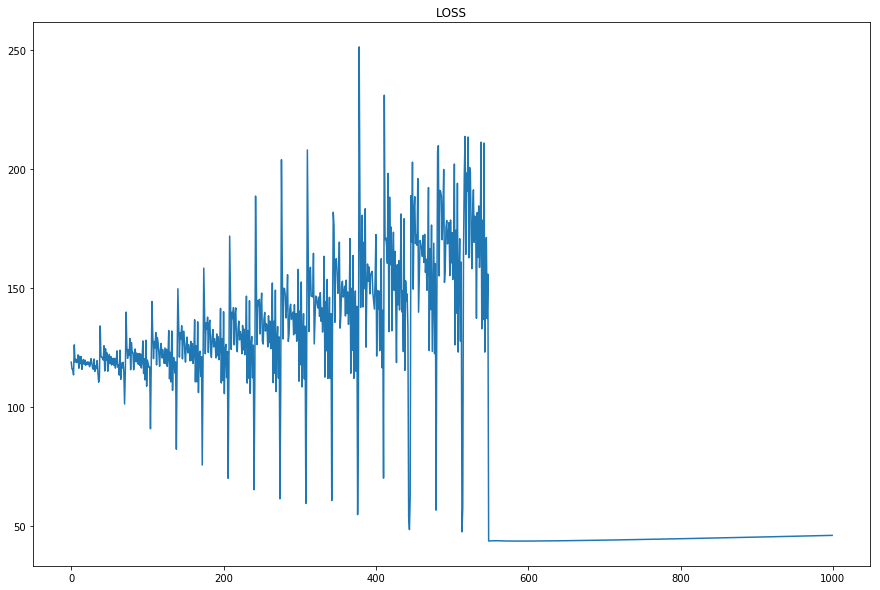

In [127]:
plt.figure(figsize=(15,10))

plt.plot(range(len(loss)), loss)
plt.title('LOSS')

Text(0.5,1,'FIT')

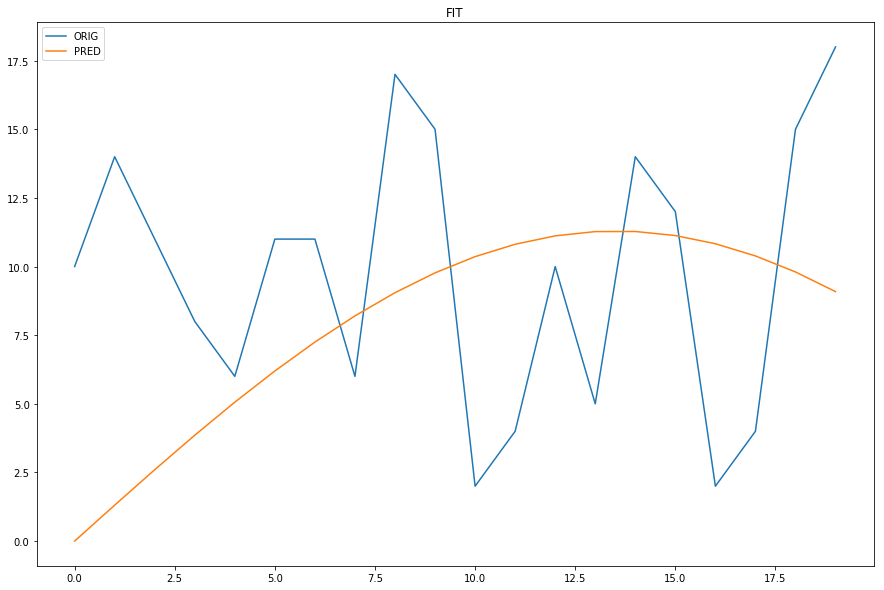

In [128]:
plt.figure(figsize=(15,10))

plt.plot(X, y, label='ORIG')
plt.plot(X, y_hat, label='PRED')
plt.legend()
plt.title('FIT')